#  XPCS   SAXS Pipeline 

 "This notebook corresponds to version {{ version }} of the pipeline tool: https://github.com/NSLS-II/pipelines"

## NSLS2 data retrieval imports

In [52]:
%matplotlib notebook
#%matplotlib inline


In [53]:
#ls

In [54]:
cd /XF11ID/analysis/Analysis_Pipelines/Develop/

/XF11ID/analysis/Analysis_Pipelines/Develop


In [55]:
%run XPCS_SAXS.py
%run chx_generic_functions.py
%run Two_Time_Correlation_Function.py
%run speckle.py

In [56]:
plt.rcParams.update({'figure.max_open_warning': 0})

In [57]:
import os,sys

# Startup Setting

## Detector

In [58]:
detector = 'eiger4m_single_image'

In [59]:

path = '/home/yuzhang/Analysis/2016_1/Results/'
pathm = '/home/yuzhang/Analysis/2016_1/Results/'  #for read mask file
print ("The analysis results will be saved in : %s"%path)

dt =datetime.now()
CurTime = '%s%02d%02d-%02d%02d' % (dt.year, dt.month, dt.day,dt.hour,dt.minute)


#mask_name =  "March_colloidal"  +"_mask.npy"  #good for AuRod
mask_name = 'corapor407'+"_mask.npy"
mask_name = 'corapor416'+"_mask.npy"

#mask_name =  "March28_colloidal"  +"_mask.npy"

The analysis results will be saved in : /home/yuzhang/Analysis/2016_1/Results/


### Get the image series and metadata from the uid

In [60]:

uid = '60b2428f-e79d-4bdc-a5b7-6b13164bc6fb' 
sn = 'B1'

uid = 'xx' 
sn = 'B4'



#hdr = db[uid]

In [61]:
if not os.path.exists(path+'%s'%(sn)):
    os.mkdir( path + sn )
    path = path + sn + '/'

In [62]:
#db[-1]

In [63]:
start_time = '2016-04-17 10:11:00'
stop_time = '2016-04-17 10:30:00'

hdrs = db(start_time= start_time, stop_time = stop_time)
print ('Totally %s uids are found for this sample: %s'%(len(hdrs), sn))
sids=[]
uids=[]

Totally 11 uids are found for this sample: B4


In [64]:
for hdr in hdrs:
    s= get_sid_filenames( hdr)
    sids.append( s[0] )
    uids.append( s[1] )
sids=sids[::-1]
uids=uids[::-1]

In [65]:
i= 9
uid = uids[i]
sid = sids[i]
print (sid, uid)

14809 47d11cab-410b-4edf-968c-6affdb0e4fe2


In [66]:
db[uid]['stop']

{'exit_status': 'success',
 'reason': '',
 'run_start': '47d11cab-410b-4edf-968c-6affdb0e4fe2',
 'time': 1460902887.4174647,
 'uid': '735d5948-faba-47c4-8c7c-1f5597b4ac71'}

In [67]:

#get_sid_filenames(db[uid])
#detectors = ['eiger4m_single_image', 'eiger1m_single_image', 'eiger4m_image', 'eiger1m_image']
imgs = load_data( uid, detector  )
md = imgs.md

hdf5 path = /XF11ID/data/2016/04/17/44e59044-26a1-4db7-8eb0_5138_master.h5


In [68]:
imgs

<Frames>
Length: 2000 frames
Frame Shape: 2167 x 2070
Pixel Datatype: uint32

In [69]:
sampling = 50

In [70]:
uid = uid[:8] + '--%s-%s_'%(sid,sn)
print (uid)

47d11cab--14809-B4_


In [72]:
if False:
    for i in [6,7,8]:
     
        uid = uids[i]
        sid = sids[i]

        imgs = load_data( uid, detector  )
        uid = uid[:8] + '--%s-%s_'%(sid,sn)
        imgsa = apply_mask( imgs, mask )
        show_img( imgsa[0], vmin=.001, vmax=35,  xlim= [ 600, 1700], ylim = [1100, 2200],
             save = T,  image_name=uid, path=path) 

## Overwrite some metadata due to wrong input

In [73]:
md

{'beam_center_x': 1209.0,
 'beam_center_y': 1327.0,
 'count_time': 0.0099900002,
 'detector_distance': 4.8400002,
 'frame_time': 0.0099999998,
 'framerate': 100.00000223517424,
 'incident_wavelength': 1.4251057,
 'pixel_mask': array([[1, 1, 1, ..., 1, 1, 0],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ..., 
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint32),
 'x_pixel_size': 7.5000004e-05,
 'y_pixel_size': 7.5000004e-05}

In [74]:
dpix =   0.075        #in eiger 4M, mm
Ldet = md['detector_distance'] *1000     #4840 in mm
lambda_  = md['incident_wavelength']  #1.4250998
timeperframe=md['frame_time']
#center = md['beam_center_x'], md['beam_center_y']
#center = [1212, 1487]  # center of the speckle pattern
center = [1217, 2167-536]  # center of the speckle pattern

center = [1217, 2167-536]  # center of the speckle pattern



center=[center[1], center[0]]
print (center)

[1631, 1217]


In [75]:
setup_pargs=dict(uid=uid, dpix= dpix, Ldet=Ldet, lambda_= lambda_, 
                 timeperframe=timeperframe, center=center, path = path)

In [76]:
setup_pargs

{'Ldet': 4840.0001525878906,
 'center': [1631, 1217],
 'dpix': 0.075,
 'lambda_': 1.4251057,
 'path': '/home/yuzhang/Analysis/2016_1/Results/',
 'timeperframe': 0.0099999998,
 'uid': '47d11cab--14809-B4_'}

## Load Mask 

In [231]:
mask = load_mask( pathm, mask_name, plot_ =  False )

## Apply Mask to time-series

In [232]:
imgsa = apply_mask( imgs, mask )

In [79]:
#path ='/home/yuzhang/Analysis/2016_1/Results/B1/'

In [80]:
T=True
F=False

<IPython.core.display.Javascript object>


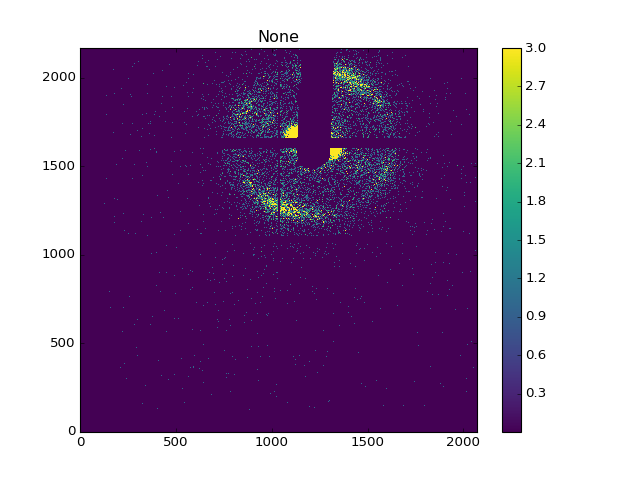

In [365]:
show_img( imgsa[0], vmin=.0001, vmax=3 ) 

In [30]:
#%run chx_generic_functions.py

In [31]:
#center

<IPython.core.display.Javascript object>


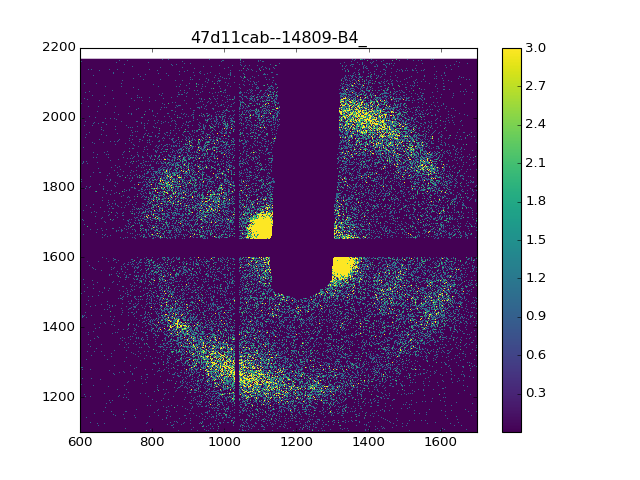

In [366]:
show_img( imgsa[0], vmin=.001, vmax=3,  xlim= [ 600, 1700], ylim = [1100, 2200],
         save = T,  image_name=uid, path=path) 

In [32]:
#show_img( imgsa[0], vmin=.01, vmax=5,  ylim= [ 1432-40, 1432+40], xlim = [1356-40, 1356+40],
#         save = F,  image_name=uid, path=path) 

In [33]:
#%run '/home/yuzhang/Analysis/2016_1/make_movie_B1.py'

In [34]:
#show_img( imgsa[0],  norm= LogNorm(vmin=.1, vmax=5)) 

## Check shutter open frame and get good time series

In [83]:
good_start = check_shutter_open( imgsa,  min_inten=5, time_edge = [0,1], plot_ = False )

The first frame with open shutter is : 0


In [84]:
good_series = apply_mask( imgs[good_start:], mask )
Nimg = len(good_series)

## Find bad frames by checking total scattering intensity 

In [37]:
#good_series = apply_mask( imgs[:15], mask )
#Nimg = len(good_series)

<IPython.core.display.Javascript object>


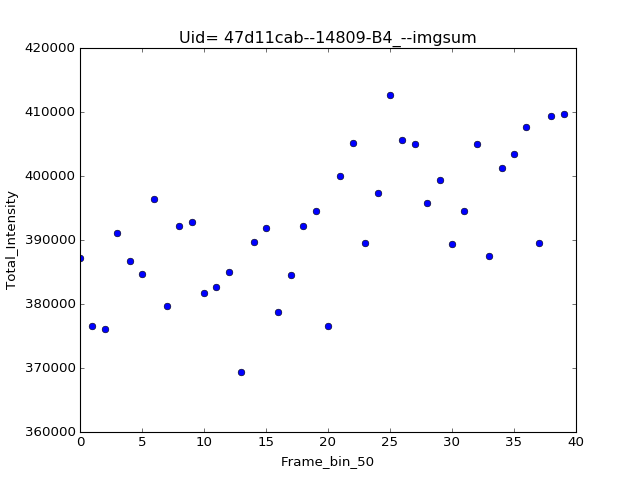

No bad frames are involved.


In [367]:
imgsum, bad_frame_list = get_each_frame_intensity(good_series ,sampling = sampling, 
                                bad_pixel_threshold=1e8,  plot_ = True, uid=uid)

## Get intensity average image

<IPython.core.display.Javascript object>


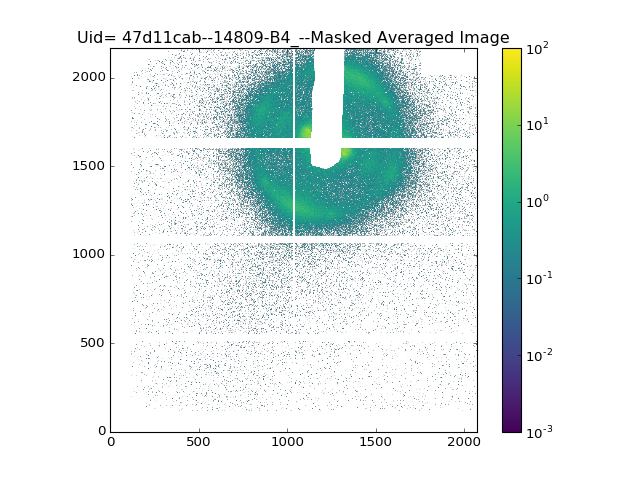

In [383]:
avg_img =  get_avg_img( good_series, sampling = sampling, plot_ = True, uid =uid)

#avg_img =  get_avg_img( good_series, sampling = 50, plot_ = True, uid =uid)

In [87]:
#show_img( avg_img, vmin=.01, vmax=.1,    save =F,  image_name=uid, path=path)

<IPython.core.display.Javascript object>


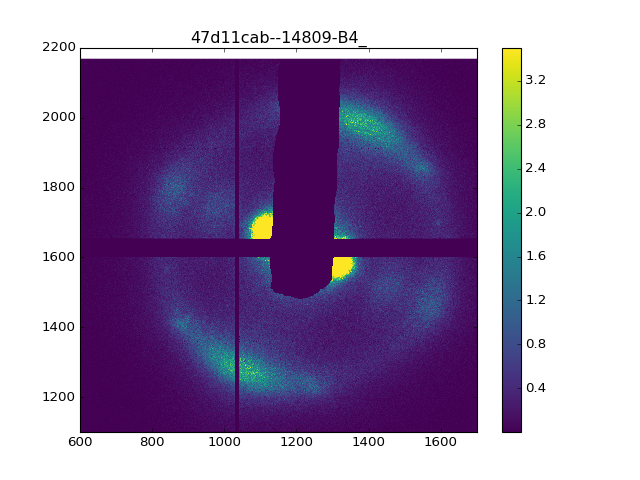

In [368]:
#show_img( avg_img, norm= LogNorm(vmin=.01, vmax=1 ) )
show_img( avg_img, vmin=.001, vmax=3.5,  xlim= [ 600, 1700], ylim = [1100, 2200],
         save =T,  image_name=uid, path=path) 

## Get circular average 

In [89]:
hmask = create_hot_pixel_mask( avg_img, 5000)

<IPython.core.display.Javascript object>


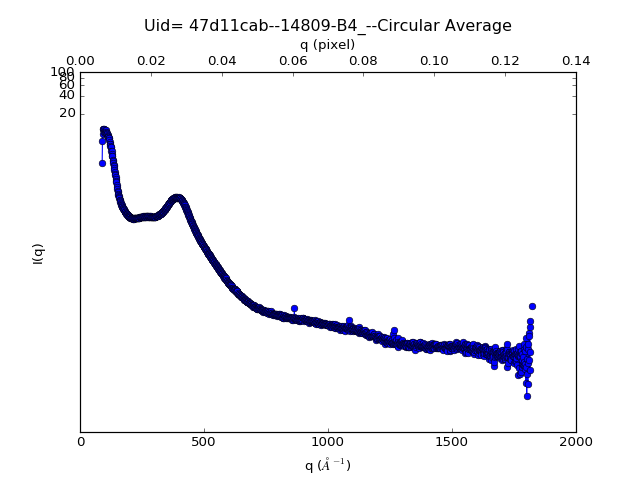

In [369]:
qp, iq, q = get_circular_average( avg_img, mask*hmask, pargs=setup_pargs,
                                plot_ = True, plot_qinpixel=False, save=True )

<IPython.core.display.Javascript object>


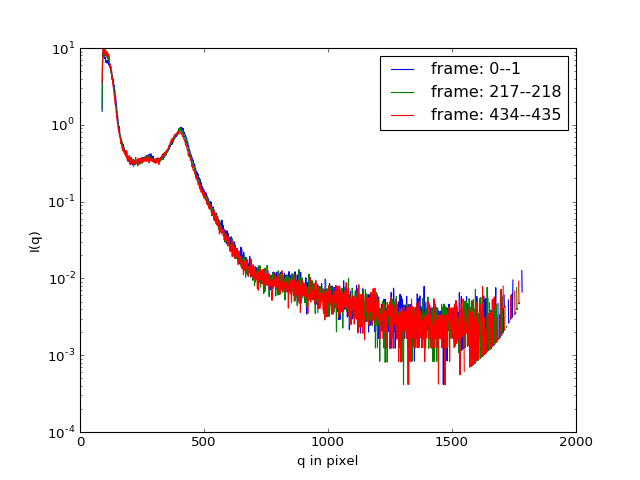

In [385]:
good_series = apply_mask( imgs[good_start:450], mask )
#good_series = apply_mask( imgs[good_start:2000], mask )
Nimg = len(good_series)
time_edge = create_time_slice( N=Nimg, slice_num= 3, slice_width=1, edges = None )

qp, iqs, q = get_t_iq( good_series, time_edge, mask*hmask, pargs=setup_pargs,
                      nx=1500,  plot_ = True, save=True  ) 

In [382]:
#plot1D(iq,qp)

## Get angular average 

<IPython.core.display.Javascript object>


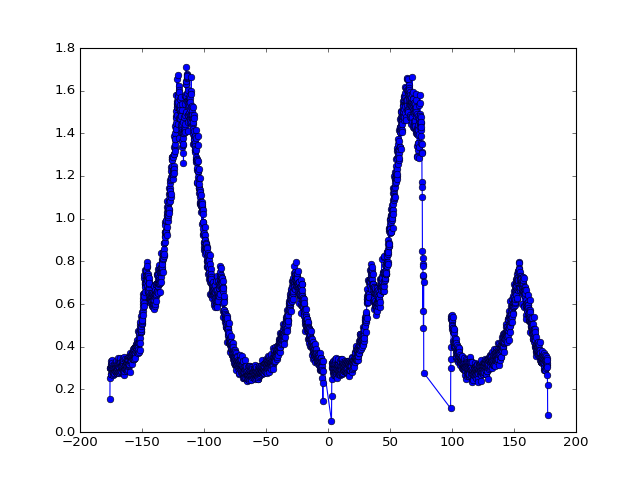

In [388]:
rc = 392
rw = 60

angq, ang = angular_average( avg_img, center, pixel_size=(dpix,dpix), nx =3000,
                    min_r = rc-rw, max_r = rc+rw, mask=mask )
plot1D( x =angq , y = ang)

<IPython.core.display.Javascript object>


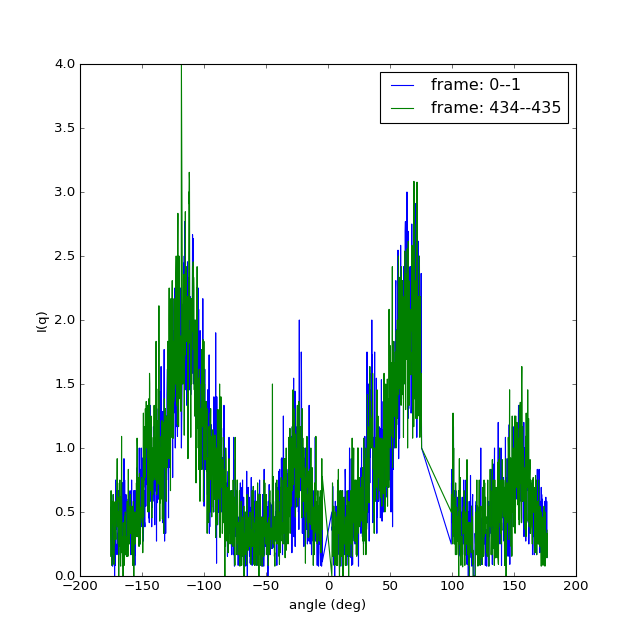

In [381]:
good_series = apply_mask( imgs[good_start:450], mask )

#good_series = apply_mask( imgs[good_start:2000], mask )
Nimg = len(good_series)
time_edge = create_time_slice( N=Nimg, slice_num= 2, slice_width=1, edges = None )
rc = 392
rw = 5
angqt, angst = get_t_ang( good_series, time_edge, mask, center, pixel_size=[dpix, dpix],   min_r = rc-rw, max_r = rc+rw,
                nx=2000,  plot_ = True, save=True, uid =uid, path=path )

## Create ring mask defined by  inner_radius, outer_radius, width, num_rings

In [376]:
rc = 392
rw = 60

inner_radius=  rc - rw   #    rc -rw/2  #rc-rw
outer_radius = rc + rw

num_rings = 3
widthr = (2*rw)/(num_rings + 10 + .2)

ring_mask, q_ring_center, q_ring_val = get_ring_mask(  mask, inner_radius= inner_radius, outer_radius = outer_radius,
                                         width = widthr, num_rings =num_rings, pargs=setup_pargs   )

<IPython.core.display.Javascript object>


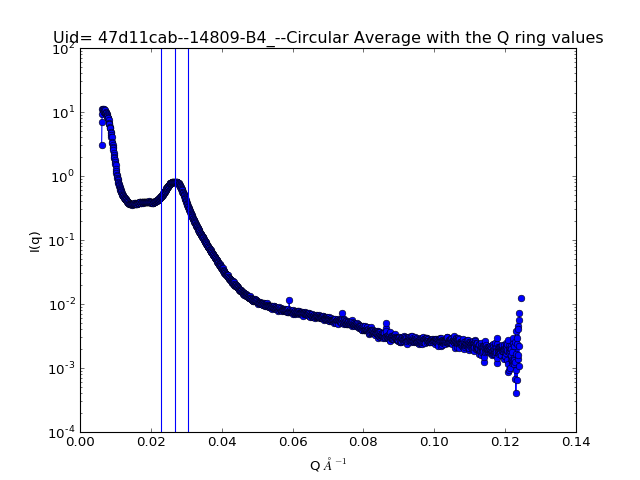

In [389]:
plot_qIq_with_ROI( q, iq, q_ring_center, logs=True, uid=uid)

In [390]:
ac = -114 
aw = 60

inner_angle= ac - aw #ac - aw
outer_angle = ac + aw
num_angles = 6

widtha = (2*aw)/(num_angles +.2)

ang_mask, ang_center, ang_edges = get_angular_mask( mask,  inner_angle= inner_angle, 
                     outer_angle = outer_angle, width = widtha,  num_angles = num_angles, center = center    )

<IPython.core.display.Javascript object>


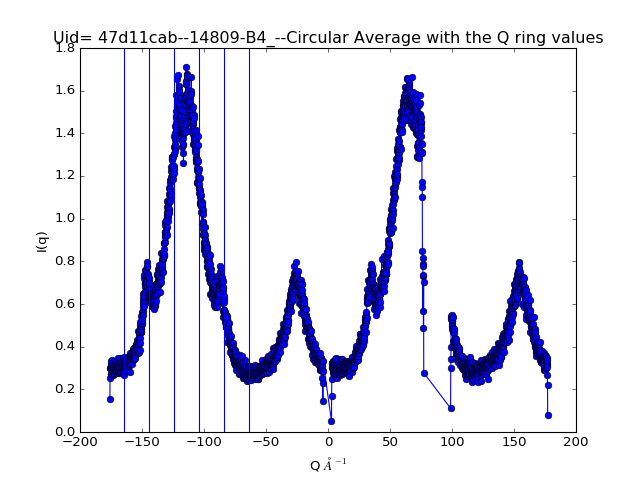

In [392]:
plot_qIq_with_ROI( angq, ang,  ang_center, logs=False, uid=uid)

In [410]:
seg_mask,  rcen, acen = get_ring_anglar_mask( ring_mask, ang_mask, q_ring_center, ang_center)

In [258]:
#ang_edges

In [259]:
#show_img( ring_mask * ang_mask)
#show_img( ring_mask )
#show_img(   ang_mask)
#show_img( avg_img * ang_mask,vmax=12 )
#show_img( avg_img * ang_mask * ring_mask,vmax=12 )
#show_img(   ang_mask * ring_mask,vmax=12 )


<IPython.core.display.Javascript object>


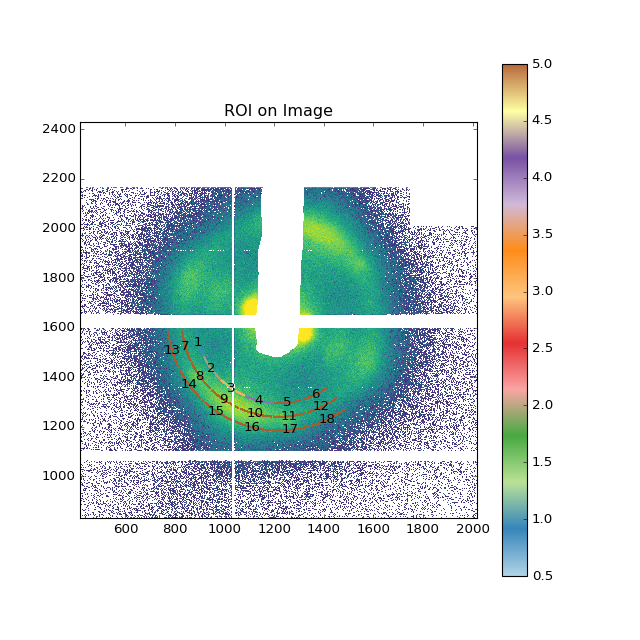

In [358]:
#qr_mask = make_ring_mask( center, avg_img.shape, rc-rw, rc+rw ) *6
#show_ROI_on_image( avg_img, qr_mask, center, rwidth=800, alpha=.9)

show_ROI_on_image( avg_img, seg_mask, center, label_on = True, rwidth=800, alpha=.9)

In [261]:
#%run XPCS_SAXS.py
#%run chx_generic_functions.py

In [262]:
good_start = 15
good_series = apply_mask( imgs[good_start:2000], mask )

#good_series = apply_mask( imgs[good_start:2000], mask )
Nimg = len(good_series)


In [263]:
qind, pixelist = roi.extract_label_indices(  seg_mask  )
t0 = time.time()
data_pixel =   Get_Pixel_Array( good_series , pixelist).get_data()
run_time(t0)

Total time: 1.68 min


In [264]:
mean_inten = get_mean_intensity( data_pixel, qind)
K_mean = np.array( [mean_inten[i].mean() for i in  list(mean_inten.keys() )] )
print( K_mean )
max_cts = data_pixel.max()
print (max_cts)



[ 0.30653772  0.45526897  0.84559468  0.80210102  0.40755812  0.2976835
  0.42002929  0.88714023  1.6561722   1.56275576  0.75565069  0.35613056
  0.2014097   0.34097061  0.63543029  0.58979719  0.303347    0.17353384]
16.0


In [395]:
qmax_int = np.argmax( K_mean )
qmax_int

8

In [396]:
qmax_int = 6

In [397]:
pixelist_qi =  np.where( qind == qmax_int)[0]         
kymo = data_pixel[:,pixelist_qi].T

In [398]:
#show_img( kymo[:100,:].T, vmin=.1, vmax=5, aspect='auto' )

<IPython.core.display.Javascript object>


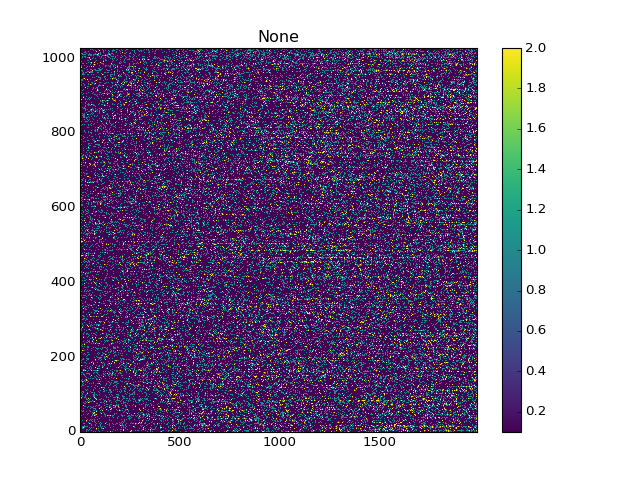

In [400]:
show_img( kymo, vmin=.1, vmax=2 ,aspect='auto' )

In [401]:
kt = np.average(kymo, axis = 0 )

<IPython.core.display.Javascript object>


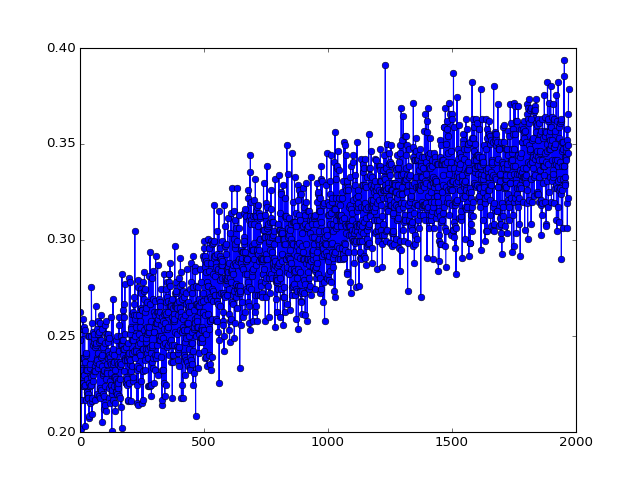

In [402]:
plot1D( kt[14:],  save=True, plot_name = uid + 'waterfall_1D_box', path = path )

In [271]:
 data_pixel.shape

(1985, 21386)

In [272]:
#%run Two_Time_Correlation_Function.py

In [273]:
g12b = auto_two_Array( good_series, seg_mask, data_pixel = data_pixel ) 


##########Total time: 0.08 min


<IPython.core.display.Javascript object>


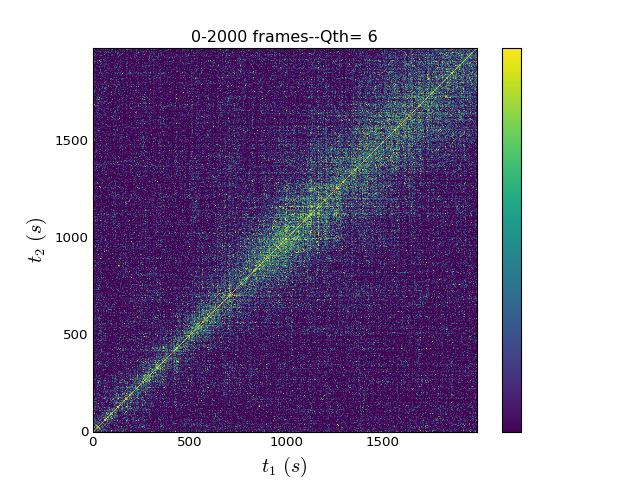

In [404]:
show_C12(g12b, q_ind= qmax_int , N1=0, N2=2000, vmin=1.05, vmax=1.25,  )


In [275]:
#g12b.shape

In [276]:
uid

'47d11cab--14809-B4_'

In [277]:
#g2b = get_one_time_from_two_time(g12b[15:500,15:500,:]) 

#g2b = get_one_time_from_two_time(g12b[15:200,15:200,:]) 
#g2b = get_one_time_from_two_time(g12b[700:1500, 700: 1500,:]) 

g2b = get_one_time_from_two_time(g12b) 

<IPython.core.display.Javascript object>


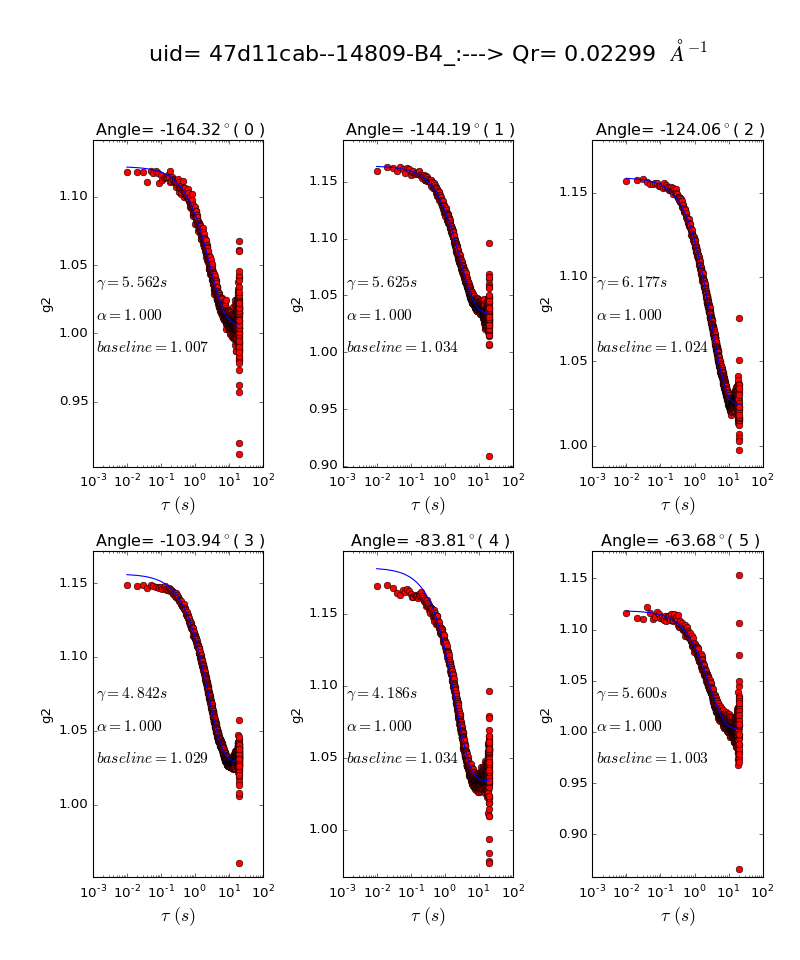

<IPython.core.display.Javascript object>


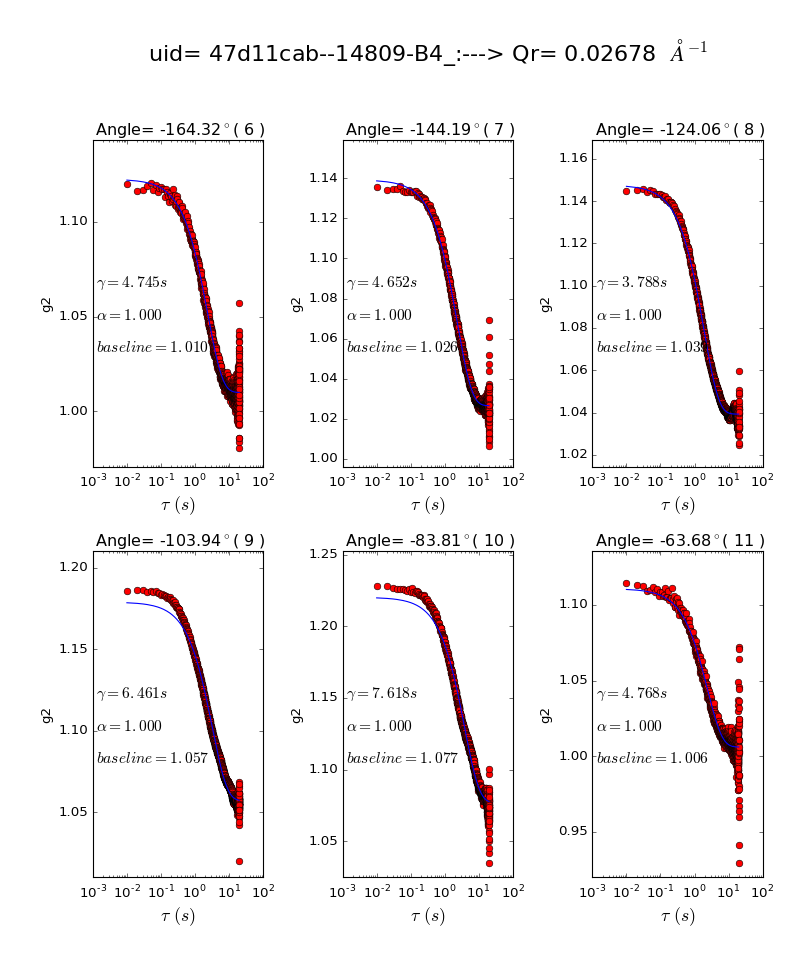

<IPython.core.display.Javascript object>


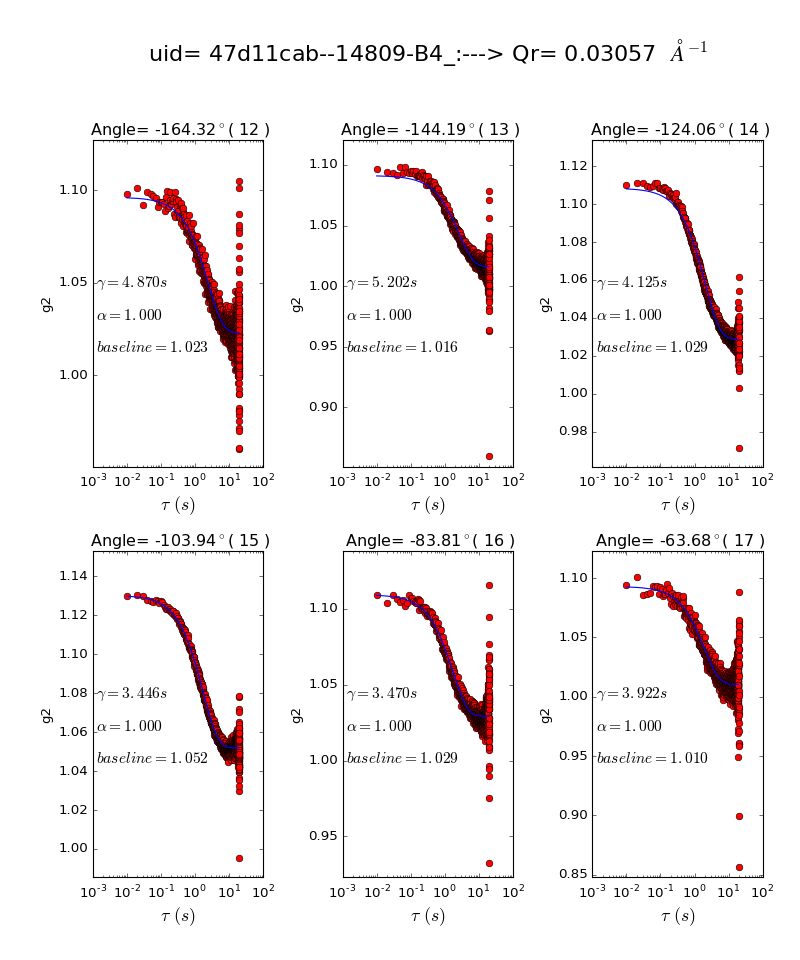

In [325]:
res = fit_saxs_rad_ang_g2( g2b, taus=np.arange( g2b.shape[0]) *timeperframe, vlim=[0.99,1.02],
            uid=uid, path=path, function='simple_exponential',
            q_ring_center=q_ring_center, ang_center=ang_center)

In [406]:
#plot1D( g2b[:,10], logx = T,  ylim= [.98, 1.15])

In [409]:
#rc

In [411]:
j = 6

rate = np.array( [ 1/res['rate'][i-1] for i in [j, j+6, j+12 ] ] )
qc2 = np.array(  [ rcen[i-1] for i in [j, j+6, j+12 ] ] )

<IPython.core.display.Javascript object>


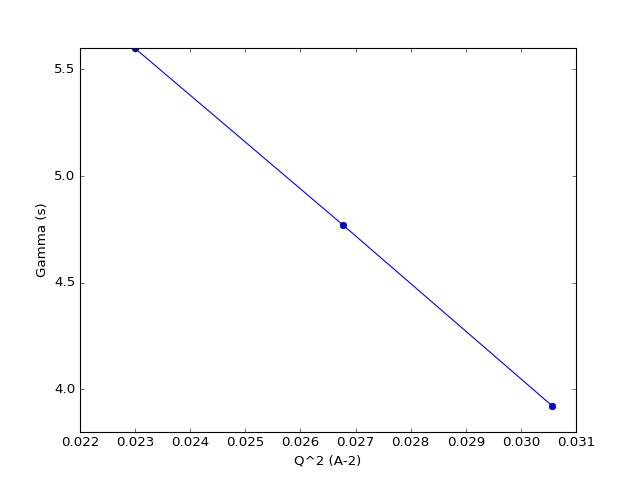

In [413]:

plot1D( x= qc2, y=rate, xlabel = 'Q^2 (A-2)', ylabel='Gamma (s)' )

In [442]:
j = 0
rate_r1 = np.array( [ 1/res['rate'][i-1] for i in 
                  np.arange(len(ang_center) ) + len(ang_center)*j +1  ] )

j = 1
rate_r2 = np.array( [ 1/res['rate'][i-1] for i in 
                  np.arange(len(ang_center) ) + len(ang_center)*j +1  ] )

j = 2
rate_r3 = np.array( [ 1/res['rate'][i-1] for i in 
                  np.arange(len(ang_center) ) + len(ang_center)*j +1  ] )

In [438]:
q_ring_center

array([ 0.02299259,  0.02678112,  0.0305696 ])

In [444]:
%run chx_generic_functions.py

<IPython.core.display.Javascript object>


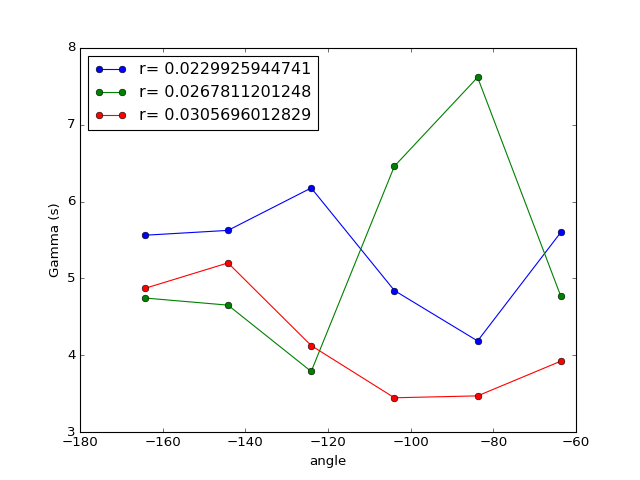

In [445]:
fig, ax = plt.subplots()
plot1D( x= ang_center, y=rate_r1, xlabel = 'angle', ylabel='Gamma (s)',ax=ax, legend='r= %s'%q_ring_center[0]  )
plot1D( x= ang_center, y=rate_r2, xlabel = 'angle', ylabel='Gamma (s)',ax=ax, legend='r= %s'%q_ring_center[1]  )
plot1D( x= ang_center, y=rate_r3, xlabel = 'angle', ylabel='Gamma (s)',ax=ax, legend='r= %s'%q_ring_center[2]  )




In [219]:
#plot_saxs_rad_ang_g2( g2b, taus=np.arange( g2b.shape[0]) *timeperframe, vlim=[0.99,1.02],
#    uid=uid, path=path, q_ring_center=q_ring_center, ang_center=ang_center)

In [119]:
#plot_saxs_g2( g2b, taus= np.arange( g2b.shape[0]) *timeperframe, ylim=[0.9, 31.3],
#             q_ring_center = q_ring_center, vlim=[.99, 1.01], uid=uid, path = path )
res = fit_saxs_g2( taus= np.arange( g2b.shape[0]) *timeperframe, g2= g2b , function='simple',
            uid=uid, path=path, q_ring_center=q_ring_center)

<IPython.core.display.Javascript object>

IndexError: index 1 is out of bounds for axis 0 with size 1

In [748]:
#q_ring_center

## Check one ring intensity 

<IPython.core.display.Javascript object>


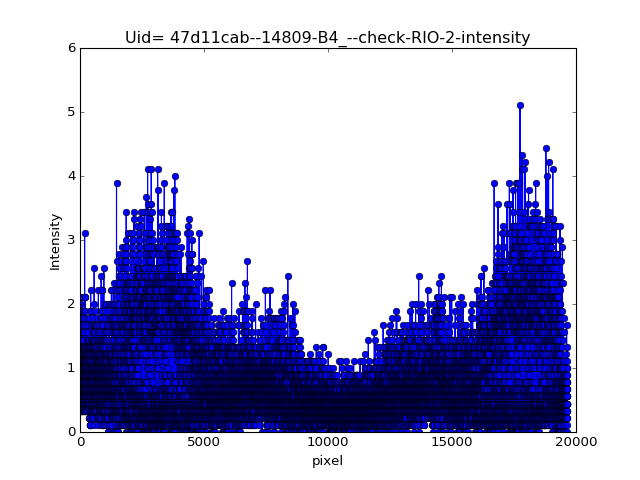

In [428]:
roi_inten = check_ROI_intensity( avg_img, ring_mask, ring_number= 2, uid =uid )

## Check beam damage
* check time~I(q)
* check mean intensity of each ring as a function of time

In [516]:
time_edge = create_time_slice( N=Nimg, slice_num= 3, slice_width=5, edges = None )

<IPython.core.display.Javascript object>


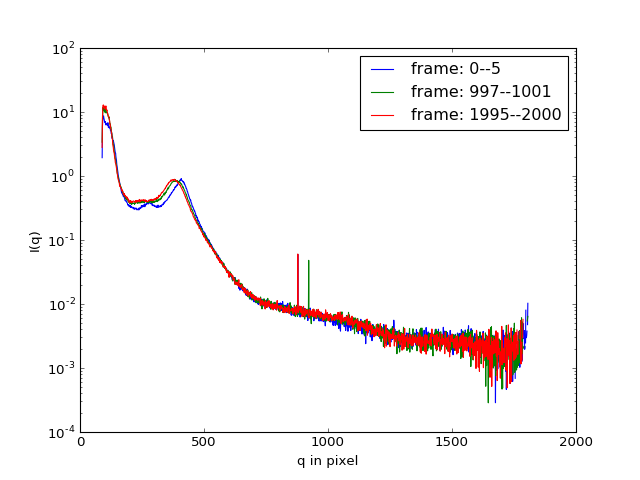

In [517]:
qp, iqs, q = get_t_iq( good_series, time_edge, mask*hmask, pargs=setup_pargs,
                      nx=1500,  plot_ = True, save=True,     )

## Redifine a good_series if there is a beam damage 

<IPython.core.display.Javascript object>


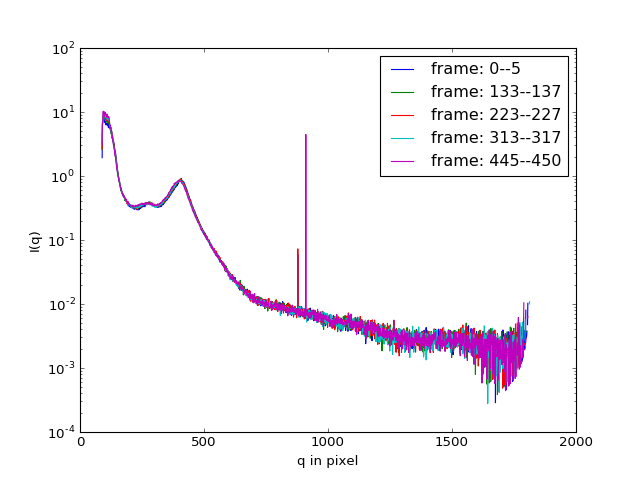

In [528]:
if True:
    good_series = apply_mask( imgs[good_start:450], mask )
    Nimg = len(good_series)
    time_edge = create_time_slice( N=Nimg, slice_num= 5, slice_width=5, edges = None )
    qp, iqs, q = get_t_iq( good_series, time_edge, mask*hmask, pargs=setup_pargs,
                      nx=1500,  plot_ = True, save=True,     )

#calc_q( Ldet, get_distance( center, [1432, 1356]  )* dpix,  lambda_, )

#avg_img =  get_avg_img( good_series, sampling = sampling, plot_ = True, uid =uid)


<IPython.core.display.Javascript object>


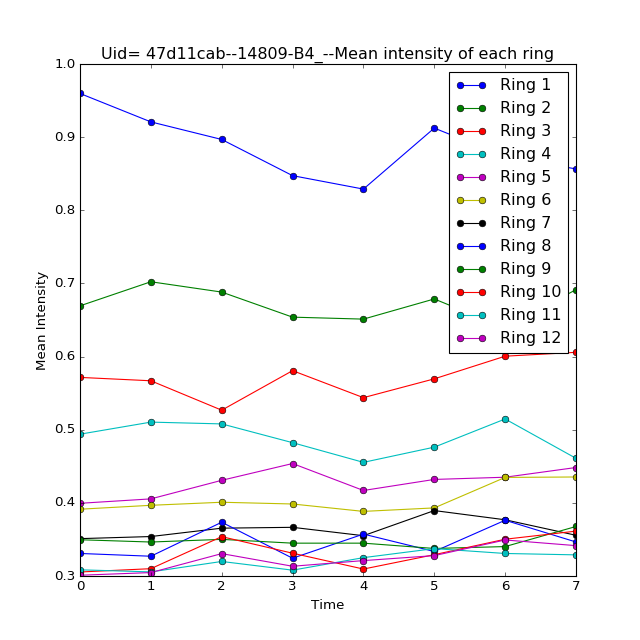

In [526]:
mean_int_sets = get_each_ring_mean_intensity(good_series, ring_mask, sampling = sampling,
               timeperframe = md['frame_time'], plot_ = True , save=True, uid =uid, path = path, )

# Get waterfall

<IPython.core.display.Javascript object>


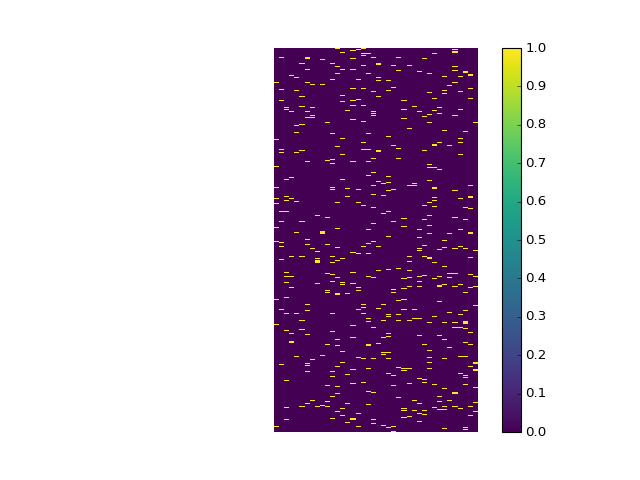

In [57]:
max_inten_ring = np.argmax(  np.average( mean_int_sets[1], axis = 0 )  )
kymo = roi.kymograph(good_series[:: sampling], ring_mask, num = max_inten_ring)
show_img( kymo.T, vmax=1.0, aspect = .1 )

## One time Correlation

In [265]:
bad_image_process = False
if  len(bad_frame_list):
    bad_image_process = True
bad_image_process 

False

In [266]:
t0 = time.time()
g2, lag_steps  =cal_g2( good_series, ring_mask, bad_image_process,
                       bad_frame_list,good_start, num_buf = 8 )
run_time(t0)

In this g2 calculation, the buf and lev number are: 8--12--
10000 frames will be processed...
G2 calculation DONE!
Total time: 7.47 min


In [267]:
taus = lag_steps * timeperframe
res_pargs = dict(taus=taus, q_ring_center=q_ring_center, path=path, uid=uid        )

<IPython.core.display.Javascript object>


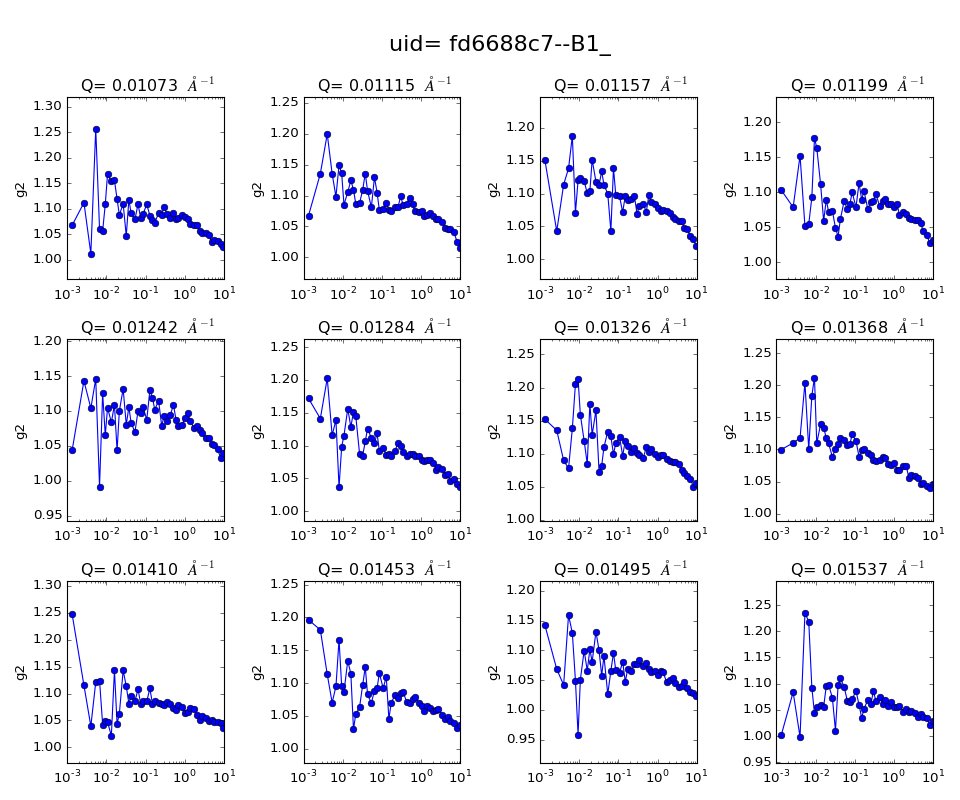

In [268]:
plot_saxs_g2( g2, taus, vlim=[0.95, 1.05], res_pargs=res_pargs) 

In [ ]:
#save_saxs_g2(  g2, res_pargs )

<IPython.core.display.Javascript object>


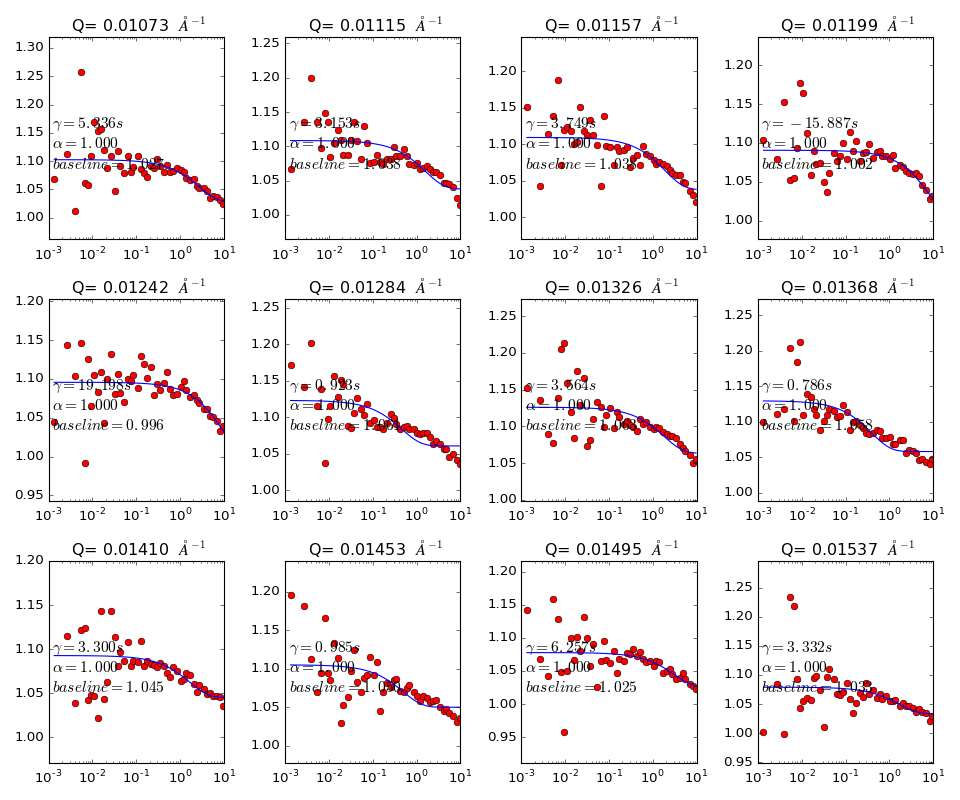

In [269]:
result = fit_saxs_g2( g2, res_pargs, function = 'simple')

## Two time correlation

In [270]:
#kymo = roi.kymograph(good_series[:: 1], qreg_mask, num = 1)
qind, pixelist = roi.extract_label_indices(  ring_mask )
t0 = time.time()
data_pixel =   Get_Pixel_Array( good_series , pixelist).get_data()
run_time(t0)

Total time: 8.49 min


In [271]:
mean_inten = get_mean_intensity( data_pixel, qind)

In [272]:
K_mean = np.array( [mean_inten[i].mean() for i in  list(mean_inten.keys() )] )
print( K_mean )
max_cts = data_pixel.max()
print (max_cts)

[ 0.00436686  0.00446042  0.0046296   0.00473735  0.00481221  0.00483067
  0.00488013  0.00461849  0.0042885   0.00403513  0.00376735  0.00334111]
3.0


In [273]:
 max_inten_ring = np.argmax( K_mean)

In [274]:
pixelist_qi =  np.where( qind == max_inten_ring)[0]         
kymo = data_pixel[:,pixelist_qi] 

<IPython.core.display.Javascript object>


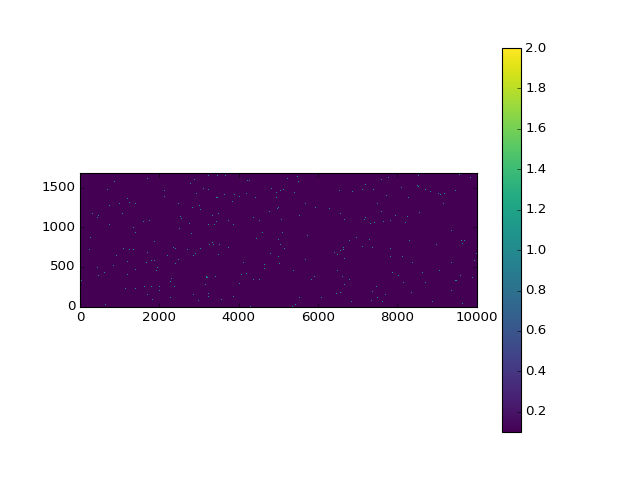

In [275]:
show_img( kymo.T, vmin=.1, vmax=2.0, aspect = 2)

In [276]:
#kymo.mean()

<IPython.core.display.Javascript object>


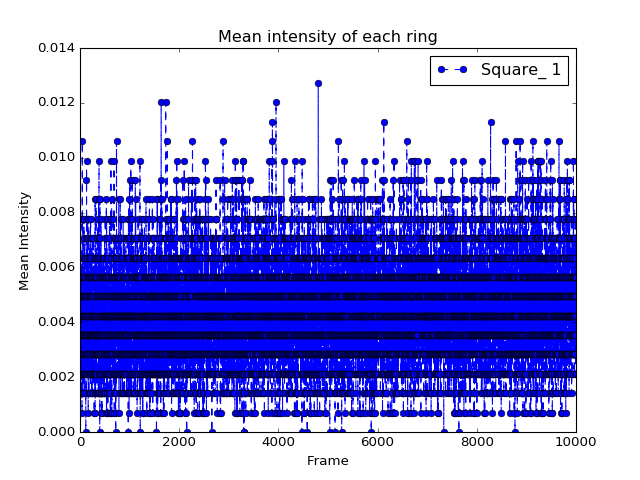

In [277]:

times = np.arange(  mean_inten[1].shape[0]   )  #*timeperframe  # get the time for each frame

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Mean intensity of each ring")
for i in range(1):
    ax.plot(times, mean_inten[i+1], '--o', label="Square_ "+str(i+1))
    ax.set_xlabel("Frame")
    ax.set_ylabel("Mean Intensity")
ax.legend(loc='best') 
plt.show()

### Time correlation analysis

In [278]:
g12b = auto_two_Array( good_series, ring_mask, data_pixel = data_pixel ) 

###########Total time: 1.05 min


<IPython.core.display.Javascript object>


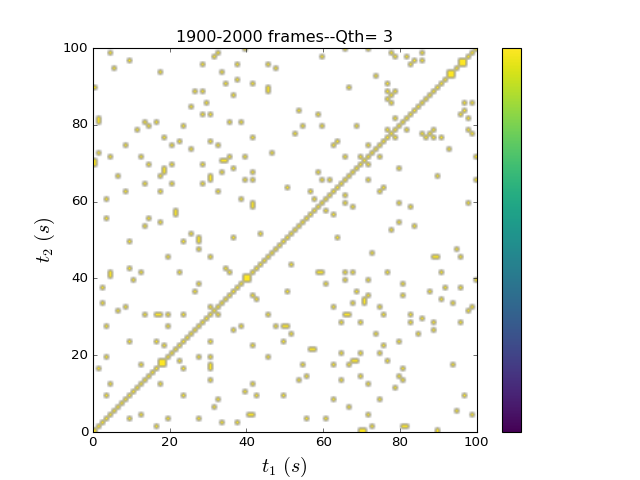

In [279]:

show_C12(g12b, q_ind=3, N1=1900, N2=2000, vmin=1.15, vmax=1.55,  )



In [375]:
g2b = get_one_time_from_two_time(g12b)

<IPython.core.display.Javascript object>


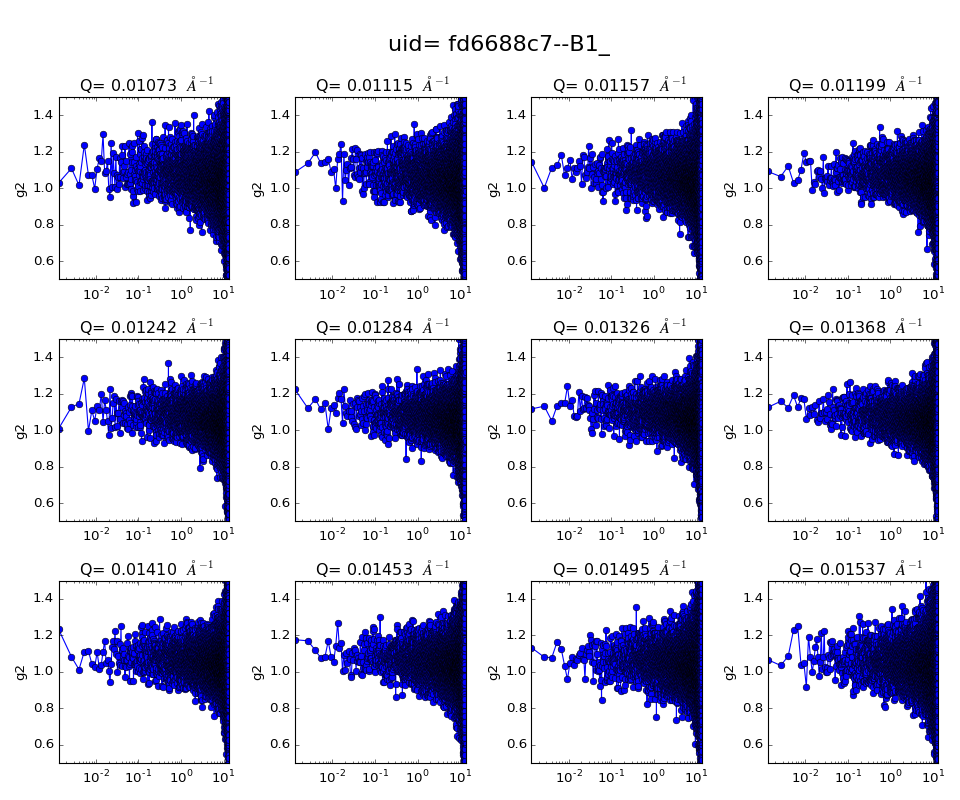

In [378]:
plot_saxs_g2( g2b, taus= np.arange( g2b.shape[0]) *timeperframe, ylim=[.5, 1.5], 
    xlim = [timeperframe,g2b.shape[0] *timeperframe], q_ring_center = q_ring_center,   uid=uid, path = path )

In [334]:
#np.arange( g2b.shape[0]) *timeperframe

In [350]:
%run XPCS_SAXS.py

<IPython.core.display.Javascript object>


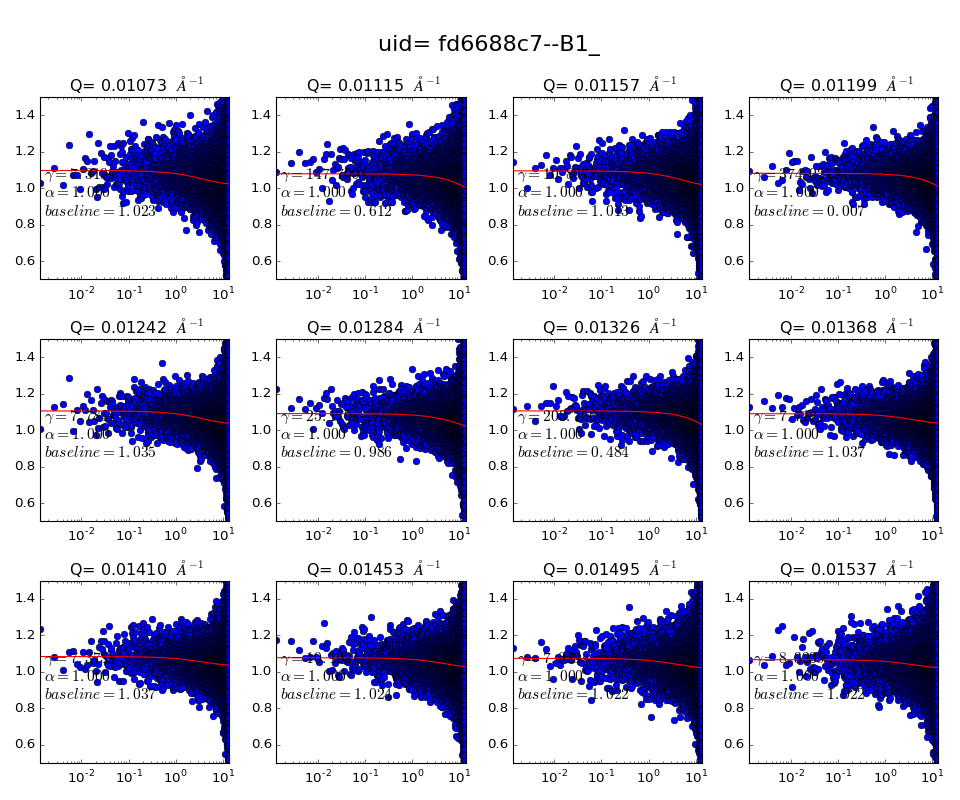

In [382]:
 
#plot_saxs_g2( g2b, taus= np.arange( g2b.shape[0]) *timeperframe, ylim=[0.9, 31.3],
#             q_ring_center = q_ring_center, vlim=[.99, 1.01], uid=uid, path = path )

result = fit_saxs_g2( taus= np.arange( g2b.shape[0]) *timeperframe, g2= g2b , function='simple_exponential',
            ylim=[.5, 1.5], xlim = [0, g2b.shape[0] *timeperframe],
            uid=uid, path=path, q_ring_center=q_ring_center)

<IPython.core.display.Javascript object>


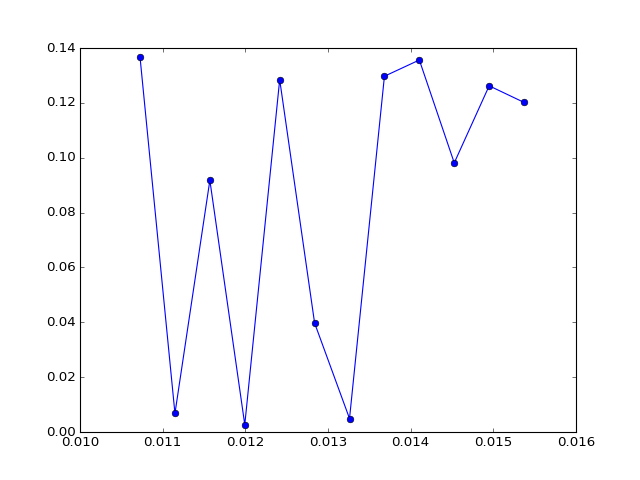

In [383]:
plot1D( x=q_ring_center, y=result['rate'] )

### Visibilty Analysis

In [284]:
spe_cts_all, std_dev = xsvs( (good_series,), np.int_(ring_mask), timebin_num=2,
    number_of_img= len(good_series), max_cts=int(max_cts+2), bad_images=None, threshold = 5000 )

##########Total time: 10.89 min


/opt/conda_envs/analysis/lib/python3.4/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full(14, 2) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [285]:
num_rings =  (ring_mask).max()
time_steps = utils.geometric_series(2,   len(good_series)   ) [:-3]
num_times = len( time_steps)
print (time_steps)
bin_edges, bin_centers, Knorm_bin_edges, Knorm_bin_centers = get_bin_edges(
      len(time_steps), num_rings, K_mean, int(max_cts+2)  )


[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]


In [286]:
#plot_sxvs( Knorm_bin_edges, spe_cts_all, uid,q_ring_center,xlim=[0,5.5] )

<IPython.core.display.Javascript object>


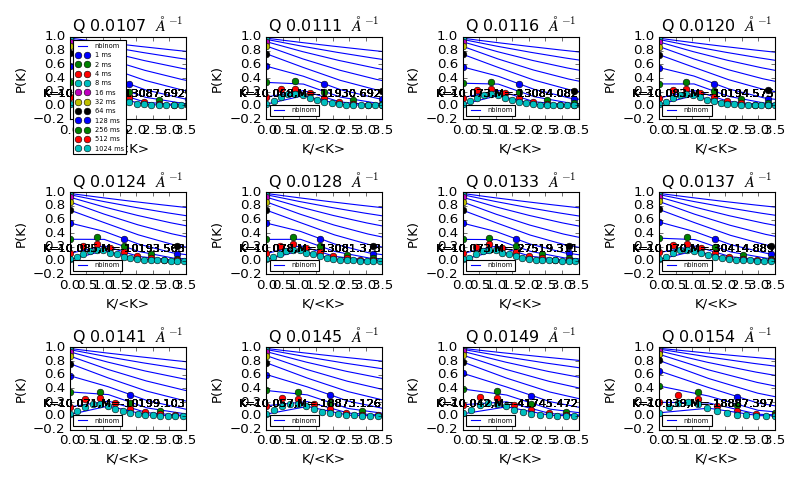

In [287]:
M_val, K_val = fit_xsvs( Knorm_bin_edges, bin_edges, spe_cts_all, K_mean=K_mean,func= 'bn',
             uid=uid,q_ring_center=q_ring_center,xlim=[0,3.5],threshold=None, time_steps=time_steps)

In [288]:
#M_val, K_val = fit_xsvs( Knorm_bin_edges, bin_edges, spe_cts_all, K_mean=K_mean,func= 'gm',
#             uid=uid,q_ring_center=q_ring_center,xlim=[0,3.5],threshold=None, time_steps=time_steps)
#M_val, K_val = fit_xsvs( Knorm_bin_edges, bin_edges, spe_cts_all, K_mean=K_mean,func= 'ps',
#             uid=uid,q_ring_center=q_ring_center,xlim=[0,3.5],threshold=None, time_steps=time_steps)



In [289]:
print ([K_val[i][0] for i in range(num_rings)])
print (K_mean)


[10.065504882703792, 10.067916004541077, 10.072731928515783, 10.082582521524822, 10.084734670089743, 10.077717871914984, 10.072716617326554, 10.069586646705737, 10.070825214135651, 10.057296885207505, 10.042394113357016, 10.03854555077527]
[ 0.00436686  0.00446042  0.0046296   0.00473735  0.00481221  0.00483067
  0.00488013  0.00461849  0.0042885   0.00403513  0.00376735  0.00334111]


In [290]:
#%run speckle.py

<IPython.core.display.Javascript object>


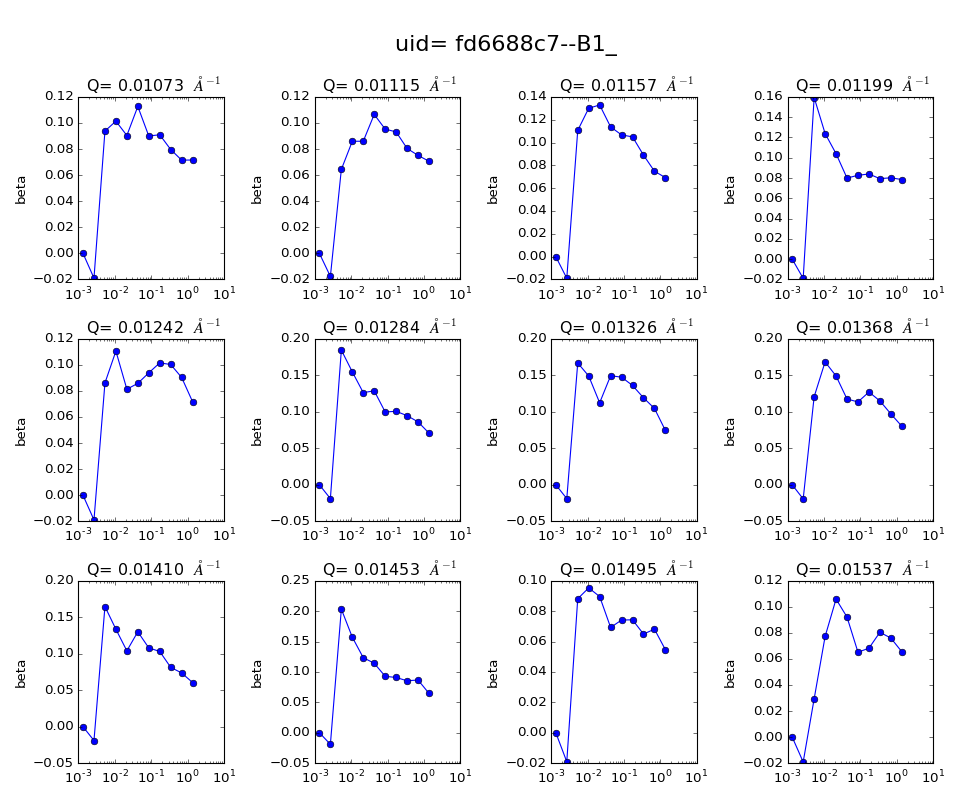

In [291]:
contrast_factor = np.zeros(( num_times,num_rings))

for i in range(num_times):
    for j in range(num_rings):
        contrast_factor[i, j] =  1/M_val[j][i]

plot_xsvs_g2( g2= contrast_factor, taus=np.array( time_steps ) * timeperframe, 
             uid=uid, q_ring_center = q_ring_center, path=path)        

In [292]:
#contrast_factor

<IPython.core.display.Javascript object>


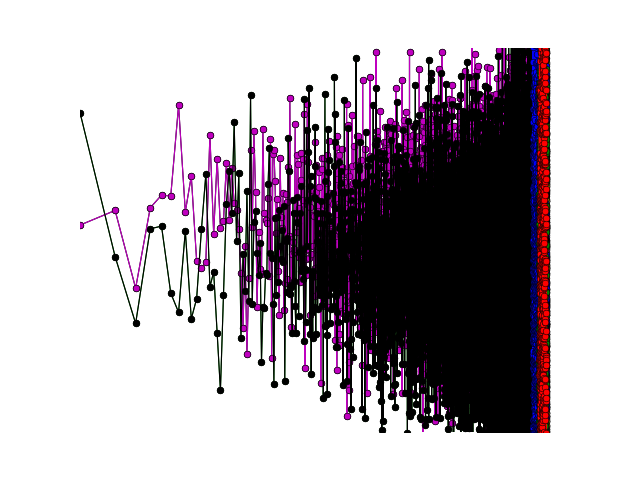

In [293]:
fig, ax = plt.subplots()
plot1D( x= np.arange( len(g2b) )*timeperframe, y= g2b,
           ax=ax, logx=True, ylim=[.9,1.3], xlim = [0,24] )
plot1D( x= np.array( time_steps ) * timeperframe, y=contrast_factor,
           ax=ax, logx=True, ylim=[.9,1.3], xlim = [0,24] ) 

In [294]:
M_val

{0: [-13087.691885788952,
  -52.612857856742423,
  10.66551188308908,
  9.859133711174449,
  11.063178856368596,
  8.8753470326774018,
  11.110700540577811,
  10.992245460828842,
  12.556258560555872,
  13.985110791812732,
  13.96975721261914],
 1: [-11930.691996660775,
  -56.424990351935612,
  15.533768728001963,
  11.631927794945856,
  11.627691282196128,
  9.3839033519230028,
  10.49632645888032,
  10.734246279880887,
  12.430785598794836,
  13.305432180409079,
  14.160837787508525],
 2: [-13084.081583745543,
  -52.678388217672548,
  9.0401807690269234,
  7.6887793592505034,
  7.522805977008578,
  8.7965134969273997,
  9.3724029413850722,
  9.527735705187478,
  11.234649984872853,
  13.365025183061814,
  14.436065866547422],
 3: [-10194.574564456389,
  -52.715324280605898,
  6.2730378335584716,
  8.0710026443743175,
  9.616075040304743,
  12.509096206661576,
  12.093759923510753,
  11.906659971698051,
  12.604133176419447,
  12.460424618417294,
  12.74602900941958],
 4: [-10193.5631

# The End!